<a href="https://colab.research.google.com/github/3umin/DL4AI_Class/blob/main/week3/chapter03_introduction-to-keras-and-tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.33462128]
 [-1.1271942 ]
 [-1.1507748 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.6419351 ]
 [0.65379405]
 [0.23482263]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

In [8]:
x

array([[0., 1.],
       [1., 1.]])

**Creating a TensorFlow variable**

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.46823126],
       [0.58631   ],
       [1.2079579 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [9]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [10]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [11]:
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [12]:
# tf.Variable은 numpy처럼 이런식으로 값을 바꿀 수 없음. .assign으로 바꾸기기

v[0, 0] = 2

TypeError: ignored

**Using `assign_add`**

In [13]:
# assign은 = 의 기능, assign_add는 += 의 기능

v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [16]:
a = tf.ones((2, 2))
b = tf.square(a)
print('square a' , b)
c = tf.sqrt(a)
print('sqrt a' , c)
d = b + c
e = tf.matmul(a, b)
e *= d

square a tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
sqrt a tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


#### A second look at the GradientTape API

**Using the `GradientTape`**

In [17]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [18]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using `GradientTape` with constant tensor inputs**

In [20]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using nested gradient tapes to compute second-order gradients**

In [22]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(speed, acceleration)

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(9.8, shape=(), dtype=float32)


#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [23]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [24]:
# vstack은 vertical(수직)으로 합치기

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [28]:
print(negative_samples.shape, positive_samples.shape, inputs.shape)

(1000, 2) (1000, 2) (2000, 2)


**Generating the corresponding targets (0 and 1)**

In [25]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

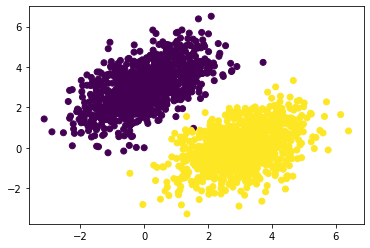

In [29]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [30]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [31]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [32]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [33]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [34]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.6223
Loss at step 1: 0.3966
Loss at step 2: 0.1568
Loss at step 3: 0.1140
Loss at step 4: 0.1015
Loss at step 5: 0.0942
Loss at step 6: 0.0880
Loss at step 7: 0.0826
Loss at step 8: 0.0776
Loss at step 9: 0.0730
Loss at step 10: 0.0689
Loss at step 11: 0.0651
Loss at step 12: 0.0616
Loss at step 13: 0.0584
Loss at step 14: 0.0556
Loss at step 15: 0.0529
Loss at step 16: 0.0505
Loss at step 17: 0.0483
Loss at step 18: 0.0463
Loss at step 19: 0.0445
Loss at step 20: 0.0428
Loss at step 21: 0.0413
Loss at step 22: 0.0399
Loss at step 23: 0.0386
Loss at step 24: 0.0374
Loss at step 25: 0.0364
Loss at step 26: 0.0354
Loss at step 27: 0.0345
Loss at step 28: 0.0337
Loss at step 29: 0.0329
Loss at step 30: 0.0323
Loss at step 31: 0.0317
Loss at step 32: 0.0311
Loss at step 33: 0.0306
Loss at step 34: 0.0301
Loss at step 35: 0.0297
Loss at step 36: 0.0293
Loss at step 37: 0.0289
Loss at step 38: 0.0286
Loss at step 39: 0.0283


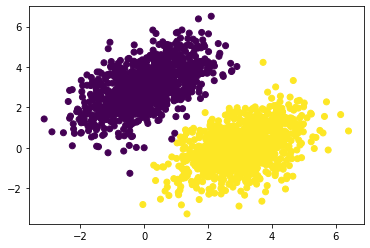

In [35]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

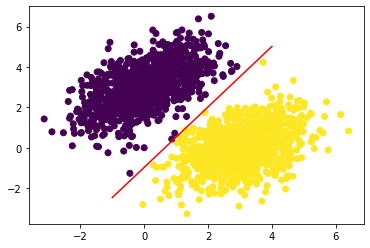

In [36]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

----

In [79]:
num_samples_per_class=500

negative_samples=np.random.multivariate_normal( mean=[2,3],cov=[[1,0.2],[0.5,1]], size=num_samples_per_class)
positive_samples=np.random.multivariate_normal( mean=[3,1],cov=[[1,0.5],[0.5,1]], size=num_samples_per_class)

<ipython-input-79-ec74b35fef16>:3: RuntimeWarning: covariance is not positive-semidefinite.
  negative_samples=np.random.multivariate_normal( mean=[2,3],cov=[[1,0.2],[0.5,1]], size=num_samples_per_class)


In [80]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

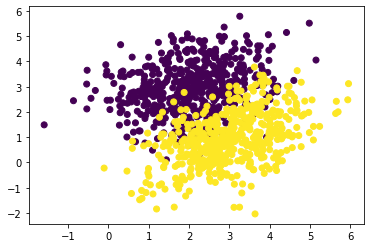

In [81]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [82]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [76]:
learning_rate = 0.1
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 6.6745
Loss at step 1: 12.9281
Loss at step 2: 29.3064
Loss at step 3: 68.7255
Loss at step 4: 162.2958
Loss at step 5: 383.8740
Loss at step 6: 908.3575
Loss at step 7: 2149.7336
Loss at step 8: 5087.8511
Loss at step 9: 12041.8350
Loss at step 10: 28500.6230
Loss at step 11: 67455.5156
Loss at step 12: 159654.4531
Loss at step 13: 377872.2188
Loss at step 14: 894353.2500
Loss at step 15: 2116767.7500
Loss at step 16: 5009995.5000
Loss at step 17: 11857729.0000
Loss at step 18: 28065032.0000
Loss at step 19: 66424692.0000
Loss at step 20: 157214880.0000
Loss at step 21: 372098432.0000
Loss at step 22: 880687872.0000
Loss at step 23: 2084423936.0000
Loss at step 24: 4933443584.0000
Loss at step 25: 11676545024.0000
Loss at step 26: 27636207616.0000
Loss at step 27: 65409761280.0000
Loss at step 28: 154812743680.0000
Loss at step 29: 366412890112.0000
Loss at step 30: 867231006720.0000
Loss at step 31: 2052574150656.0000
Loss at step 32: 4858061520896.0000
Loss at step 3

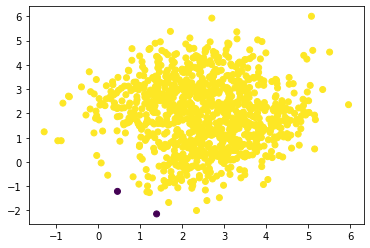

In [77]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

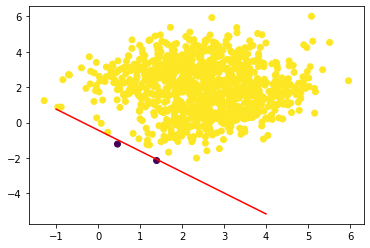

In [78]:
# learning_rate 0.1로 하면 너무 클래스 불균형하게(잘못) 예측함

x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [87]:
num_samples_per_class=500

negative_samples=np.random.multivariate_normal( mean=[2,3],cov=[[1,0.2],[0.5,1]], size=num_samples_per_class)
positive_samples=np.random.multivariate_normal( mean=[3,1],cov=[[1,0.5],[0.5,1]], size=num_samples_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))


input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

<ipython-input-87-ecfa0ec3d655>:3: RuntimeWarning: covariance is not positive-semidefinite.
  negative_samples=np.random.multivariate_normal( mean=[2,3],cov=[[1,0.2],[0.5,1]], size=num_samples_per_class)


In [88]:
learning_rate = 0.01
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.7604
Loss at step 1: 2.5619
Loss at step 2: 1.8724
Loss at step 3: 1.4654
Loss at step 4: 1.2158
Loss at step 5: 1.0546
Loss at step 6: 0.9436
Loss at step 7: 0.8618
Loss at step 8: 0.7974
Loss at step 9: 0.7440
Loss at step 10: 0.6977
Loss at step 11: 0.6565
Loss at step 12: 0.6191
Loss at step 13: 0.5848
Loss at step 14: 0.5532
Loss at step 15: 0.5238
Loss at step 16: 0.4964
Loss at step 17: 0.4710
Loss at step 18: 0.4472
Loss at step 19: 0.4250
Loss at step 20: 0.4043
Loss at step 21: 0.3850
Loss at step 22: 0.3670
Loss at step 23: 0.3501
Loss at step 24: 0.3344
Loss at step 25: 0.3197
Loss at step 26: 0.3060
Loss at step 27: 0.2931
Loss at step 28: 0.2811
Loss at step 29: 0.2699
Loss at step 30: 0.2595
Loss at step 31: 0.2497
Loss at step 32: 0.2406
Loss at step 33: 0.2321
Loss at step 34: 0.2241
Loss at step 35: 0.2166
Loss at step 36: 0.2097
Loss at step 37: 0.2031
Loss at step 38: 0.1971
Loss at step 39: 0.1914


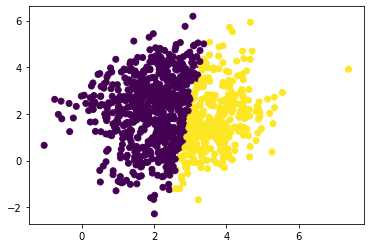

In [89]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

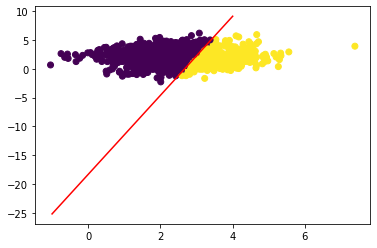

In [90]:
# learning_rate 값을 조정해서 제대로 예측

x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [94]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [95]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [96]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [97]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [98]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [99]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [100]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [101]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
8/8 [==============================] - 1s 3ms/step - loss: 1.1980 - binary_accuracy: 0.8650
Epoch 2/5
8/8 [==============================] - 0s 3ms/step - loss: 1.1410 - binary_accuracy: 0.8740
Epoch 3/5
8/8 [==============================] - 0s 3ms/step - loss: 1.1013 - binary_accuracy: 0.8790
Epoch 4/5
8/8 [==============================] - 0s 3ms/step - loss: 1.0663 - binary_accuracy: 0.8820
Epoch 5/5
8/8 [==============================] - 0s 3ms/step - loss: 1.0336 - binary_accuracy: 0.8830


In [102]:
history.history

{'loss': [1.198048710823059,
  1.1410120725631714,
  1.1012814044952393,
  1.0663046836853027,
  1.0336456298828125],
 'binary_accuracy': [0.8650000095367432,
  0.8740000128746033,
  0.8790000081062317,
  0.8820000290870667,
  0.8830000162124634]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [103]:
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
44/44 [==============================] - 1s 14ms/step - loss: 0.3349 - binary_accuracy: 0.8171 - val_loss: 0.1349 - val_binary_accuracy: 0.8433
Epoch 2/5
44/44 [==============================] - 0s 9ms/step - loss: 0.1601 - binary_accuracy: 0.8343 - val_loss: 0.1065 - val_binary_accuracy: 0.8867
Epoch 3/5
44/44 [==============================] - 1s 19ms/step - loss: 0.1646 - binary_accuracy: 0.8271 - val_loss: 0.0870 - val_binary_accuracy: 0.9167
Epoch 4/5
44/44 [==============================] - 1s 15ms/step - loss: 0.1495 - binary_accuracy: 0.8414 - val_loss: 0.2580 - val_binary_accuracy: 0.7200
Epoch 5/5
44/44 [==============================] - 0s 5ms/step - loss: 0.1830 - binary_accuracy: 0.8086 - val_loss: 0.0870 - val_binary_accuracy: 0.9167


### Inference: Using a model after training

In [93]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

3/3 [==============================] - 0s 5ms/step
[[ 0.7787355 ]
 [ 0.30966502]
 [ 1.0161762 ]
 [ 0.74345624]
 [ 1.2925677 ]
 [ 0.21373612]
 [ 1.0132527 ]
 [ 0.338292  ]
 [ 1.1291058 ]
 [-0.13578153]]


## Summary